# Описание проекта

**Цель:** подготовить исследование рынка заведений общественного питания в Москве. Дать рекомендации по открытию небольшого оригинального кафе в Москве (гостей должны обслуживать роботы). 


**Описание данных**  
Таблица rest_data:
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

**Описание действий:**  
1. [Загрузка данных и подготовка их к анализу](#id-section1)      
2. [Анализ данных  ](#id-section2)
    - [Соотношение видов объектов общественного питания по количеству. ](#id-section3)
    - [Соотношение сетевых и несетевых заведений по количеству. ](#id-section4)
    - [Для какого вида объекта общественного питания характерно сетевое распространение?](#id-section5)
    - [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#id-section6)
    - [Среднее количество посадочных мест для каждого вида объекта общественного питания. ](#id-section7)
    - [Топ-10 улиц по количеству объектов общественного питания. ](#id-section8)
    - [Число улиц с одним объектом общественного питания. ](#id-section9)
    - [Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.  ](#id-section10)
3. [Вывод](#id-section11)

<div id='id-section1'/>

## 1. Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests

In [2]:
#отключим отображение предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [4]:
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [5]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
#приведем названия к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()

In [7]:
#уберем кавычки в названиях
rest_data['object_name'] = rest_data['object_name'].str.replace('«', '')
rest_data['object_name'] = rest_data['object_name'].str.replace('»', '')

In [8]:
#проверим на наличие дубликатов
rest_data.duplicated().sum()

0

In [9]:
#приведем данные столбца chain к булевому типу
def chain(row):
    if row[2] == 'да':
        return '1'
    else:
        return '0'

In [10]:
rest_data['chain_bool'] = rest_data.apply(chain, axis=1)

In [11]:
rest_data['chain_bool'] = rest_data['chain_bool'].astype('int')

В датафрейме содержится 15366 строк, все данные заполнены, тип верный. Все названия объектов общественного питания привели к нижнему регистру и убрали кавычки, чтобы было проще обнаружить дубликаты. 

In [12]:
#посмотрим, сколько дубликатов без столбца id
rest_data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

85

In [13]:
rest_data[rest_data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated()]

,id,object_name,chain,object_type,address,number,chain_bool
2381,28611,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100,0
3397,71896,буфет коникс-школьник,нет,буфет,"город Москва, улица Удальцова, дом 21",100,0
3481,20914,буфет мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40,0
4431,23759,столовая гбоу города москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100,0
4537,23391,столовая комбинат питания космос,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15,0
...,...,...,...,...,...,...,...
14578,222932,старый баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120,0
14596,204947,буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0,0
14844,219518,sushi-make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0,0
15173,218542,кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0,1


In [14]:
#посмотрим, сколько дубликатов без столбца number, предполагая, что в этом столбце данные заносились "на глазок"
rest_data[['object_name', 'chain', 'object_type', 'address']].duplicated().sum()

184

In [15]:
#для примера поглядим перый объект
rest_data[rest_data['object_name'] == 'комбинат питания мгту им.н.э.баумана']

,id,object_name,chain,object_type,address,number,chain_bool
113,28608,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",34,0
114,28613,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216,0
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12,0
2374,28603,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100,0
2375,28604,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",150,0
2376,28605,комбинат питания мгту им.н.э.баумана,нет,кафетерий,"город Москва, 2-я Бауманская улица, дом 5, стр...",35,0
2377,28606,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, 2-я Бауманская улица, дом 5, стр...",16,0
2378,28607,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город Москва, 2-я Бауманская улица, дом 5, стр...",16,0
2379,28609,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, 2-я Бауманская улица, дом 5, стр...",30,0
2380,28610,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",200,0


In [16]:
#запишем дубли в отдельный датафрейм
duplicate = rest_data[rest_data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated()]
#исключим из первоначального датафрейма дубли
rest_data = rest_data.query('id not in @duplicate.id')

In [17]:
rest_data

,id,object_name,chain,object_type,address,number,chain_bool
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,0
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,0
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,0
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,1
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,0
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,1
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,1
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,1
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,1


Без учета id получили 85 дублей. Если мы принимаем тот факт, что данные по количеству посадочных мест указывались "на глазок" и количество мест не будем учитвать, то дублей будет уже 184. На примере "комбинат питания мгту им.н.э.баумана" мы видим, что по одному адресу распологается несколько столовых с разным числом посадочных мест. И такая ситуация действительно возможна в университетских заведениях общественного питания. Поэтому было принято решение удалить только дубли, в которых совпадают все данные, кроме id. Велика вероятность, что среди осташихся 99 строк с отличающимся количеством посадочных мест, тоже есть дубли, но их значение крайне мало в сравнении с общим числом строк. Поэтому не удаляем

<div id='id-section2'/>

## 2.Анализ данных

In [18]:
#узнаем, какие стили доступны
print(plt.style.available)

['_classic_test', 'seaborn-darkgrid', 'seaborn-muted', 'seaborn-white', 'tableau-colorblind10', 'seaborn-whitegrid', 'bmh', 'seaborn-colorblind', 'dark_background', 'seaborn-ticks', 'seaborn-bright', 'fivethirtyeight', 'seaborn-talk', 'seaborn-deep', 'Solarize_Light2', 'classic', 'seaborn-dark-palette', 'ggplot', 'seaborn-dark', 'fast', 'grayscale', 'seaborn-pastel', 'seaborn', 'seaborn-notebook', 'seaborn-paper', 'seaborn-poster']


In [19]:
#оформим графики в едином стиле
plt.style.use('seaborn-notebook')

<div id='id-section3'/>

### Cоотношение видов объектов общественного питания по количеству

In [20]:
rest_data['object_type'].value_counts().reset_index()

,index,object_type
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1897
4,бар,855
5,буфет,576
6,кафетерий,395
7,закусочная,348
8,магазин (отдел кулинарии),273


Text(0, 0.5, 'Вид объекта')

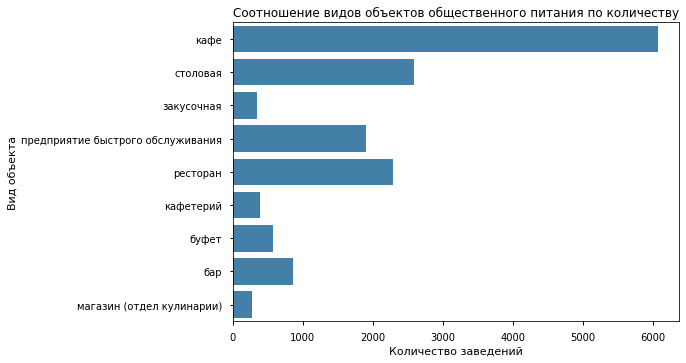

In [21]:
fig, ax = plt.subplots()
sns.countplot(y="object_type", data=rest_data, color='#3282B8')
ax.set_title('Cоотношение видов объектов общественного питания по количеству')
ax.set_xlabel('Количество заведений')
ax.set_ylabel('Вид объекта')

Среди всех заведений значительно преобладают кафе. Это говорит о том, что такие заведения пользуются спросом, наиболее востребованы. На втором и третьем месте по количеству заведений в Москве - столовая и ресторан. У них разное предназначение, разная целевая аудитория и разная ценовая категория. Меньше всего заведений типа магазин (отдел кулинарии).

<div id='id-section4'/>

### Соотношение сетевых и несетевых заведений по количеству

In [22]:
pivot_chain = rest_data.pivot_table(index='chain', values='id', aggfunc='count')

In [23]:
pivot_chain

,id
chain,
да,2964
нет,12317


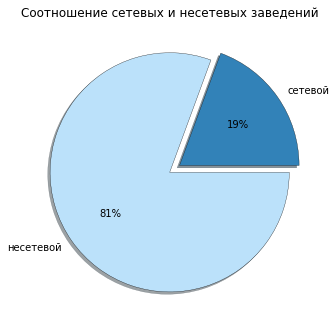

In [24]:
fig, ax = plt.subplots()

labels = 'сетевой', 'несетевой'
colors = ['#3282B8', '#BBE1FA']

plt.title('Соотношение сетевых и несетевых заведений')

ax.pie(pivot_chain, colors=colors, wedgeprops={'edgecolor': 'black'}, explode = (0.1, 0), labels= labels, autopct='%1.f%%', shadow=True)

plt.show()

Сетевых заведений 19% от общего числа. Большинство объектов общественного питания единичны. Но возможность стать сетью есть.

<div id='id-section5'/>

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [25]:
#посчитаем долю сетевых объектов для каждого вида
rest_chain = rest_data.pivot_table(index='object_type', values='chain_bool', aggfunc='mean').reset_index()

In [26]:
rest_chain

,object_type,chain_bool
0,бар,0.043275
1,буфет,0.019097
2,закусочная,0.160920
3,кафе,0.229946
4,кафетерий,0.131646
5,магазин (отдел кулинарии),0.285714
6,предприятие быстрого обслуживания,0.415393
7,ресторан,0.237949
8,столовая,0.001161


Text(0, 0.5, 'Вид объекта')

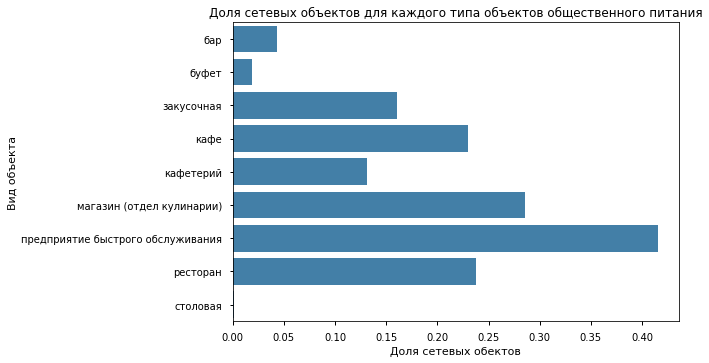

In [27]:
fig, ax = plt.subplots()
ax.set_title('Доля сетевых объектов для каждого типа объектов общественного питания')
ax= sns.barplot(x='chain_bool', y='object_type', data= rest_chain, color='#3282B8')
ax.set_xlabel('Доля сетевых обектов')
ax.set_ylabel('Вид объекта')


In [28]:
#посмотрим топ-5 популярных предприятий быстрого обслуживания по количеству точек
rest_data[rest_data['object_type'] == 'предприятие быстрого обслуживания']['object_name'].value_counts().head(5)

шаурма             154
макдоналдс         102
kfc                 99
бургер кинг         93
крошка картошка     58
Name: object_name, dtype: int64

Сетевое распространение более всего характерно для предприятий быстрого обслуживания, так называемые фастфуды. Доля сетей составляет 41%. Совсем не характерно сетевое распространение для столовых. 23% кафе имеют сети. Это говорит о том, что для кафе этот формат также работает.

<div id='id-section6'/>

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [29]:
#найдем среднее число посадочных мест и количество заведений для каждой сети
rest_chain_number = rest_data.query('chain == "да"').groupby('object_name')[['number', 'id']].agg({'id':'count', 'number':'mean'}).reset_index().sort_values(by='id', ascending=False)

In [30]:
rest_chain_number 

,object_name,id,number
540,шоколадница,157,57.184713
25,kfc,155,55.341935
314,макдоналдс,150,87.700000
107,бургер кинг,137,46.649635
499,теремок,94,25.606383
...,...,...,...
232,кафе прайм стар,1,50.000000
231,кафе поль бейкери,1,3.000000
228,кафе песто и митлес,1,80.000000
227,кафе пекарня хачапури,1,75.000000


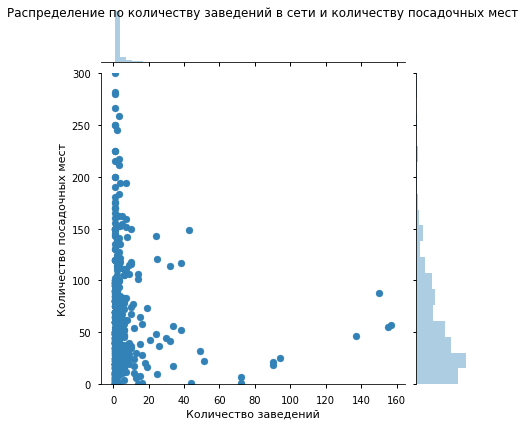

In [31]:
p=sns.jointplot(x="id", y="number", data=rest_chain_number, color='#3282B8', ylim=(0, 300)).set_axis_labels("Количество заведений", "Количество посадочных мест")
p.fig.suptitle("Распределение по количеству заведений в сети и количеству посадочных мест")
fig.subplots_adjust(top=0.93) #перенос заголовка вверх
plt.show()

Большинство сетей имеет до 20 заведений и в них до 150 мест. Среди них наиболее часто встречаются сети, в которых до 5 заведений и до 30 мест.

<div id='id-section7'/>

### Среднее количество посадочных мест для каждого вида объекта общественного питания

Text(0, 0.5, 'Вид объекта')

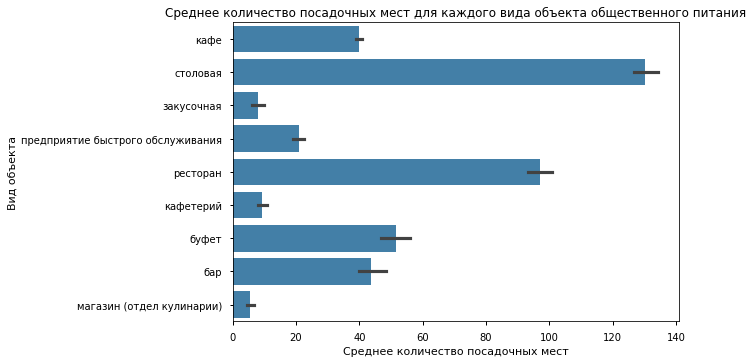

In [32]:
fig, ax = plt.subplots()
ax.set_title('Среднее количество посадочных мест для каждого вида объекта общественного питания')
ax= sns.barplot(x='number', y='object_type', data= rest_data, color='#3282B8')
ax.set_xlabel('Среднее количество посадочных мест')
ax.set_ylabel('Вид объекта')

Самое большое количество посадочных мест в столовых - 130 мест, на втором месте- рестораны - около 100. В остальных объектах общественного питания среднее количество мест значительно ниже. В кафе в среднем 40 посадочных мест, в предприятиях быстрого обслуживания - 20.

<div id='id-section8'/>

### Топ-10 улиц по количеству объектов общественного питания

In [33]:
#выделим в отдельный столбец информацию об улице из столбца address
rest_data['street'] = rest_data['address'].str.split(', ', expand=True)[1]

In [34]:
rest_data

,id,object_name,chain,object_type,address,number,chain_bool,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,0,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,0,улица Талалихина
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,0,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,1,Абрамцевская улица
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,0,Абрамцевская улица
...,...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,1,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,1,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,1,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,1,поселение Московский


In [35]:
rest_data.groupby('street')['id'].count().reset_index().sort_values(by='id', ascending=False)

,street,id
1334,город Зеленоград,232
1452,проспект Мира,203
993,Профсоюзная улица,181
683,Ленинградский проспект,170
979,Пресненская набережная,167
...,...,...
1343,дом 1,1
1345,дом 10,1
1346,дом 11,1
1347,дом 118Б,1


В столбце street встречаются город Зеленоград и поселение Московский. Эти города входят в административные округа Москвы. Имеют свои улицы. Но т.к. в КЛАДРе адресов название улиц в Зеленограде и непосредственно в Москве могут совпадать, далее будем учитывать только улицы, расположенные в Москве. 

Кроме того в адресах есть строки без указания города. Поэтому в столбец street выгрузился дом, а не улица. Т.к. нет уверенности в том, что эти адреса действительно располагаются в Москве, посмотрим на количество таких строк. Если значение невелико, то учитывать не будем.

In [36]:
#исключим из столбца street строки со словами "город", "поселение", "дом"
rest_street = rest_data[~((rest_data['street'].str.contains('город ')) | (rest_data['street'].str.contains('поселение ')) | (rest_data['street'].str.contains('дом ')))]

In [37]:
#посмотрим, как много данных мы не учли
len(rest_street) / len(rest_data)

0.943001112492638

Исключили 5% данных. Это приемлемое значение, поэтому далее для анализа улиц будем работать с таблицей rest_street

In [38]:
group_street = rest_street.groupby('street')['id'].count().reset_index()

In [39]:
top_group_street = group_street.sort_values(by='id', ascending=False).head(10)

In [40]:
top_group_street

,street,id
1389,проспект Мира,203
993,Профсоюзная улица,181
683,Ленинградский проспект,170
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1386,проспект Вернадского,128
674,Кутузовский проспект,114
600,Каширское шоссе,111
605,Кировоградская улица,108


Text(0, 0.5, 'Улица')

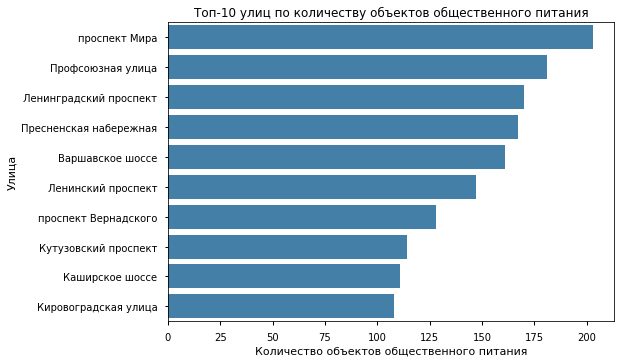

In [41]:
fig, ax = plt.subplots()
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax= sns.barplot(x='id', y='street', data= top_group_street, color='#3282B8')
ax.set_xlabel('Количество объектов общественного питания')
ax.set_ylabel('Улица')

Воспользуемся внешними данными, чтобы определить , в каком округе расположены объекты. Для этого были взяты данные с портала открытых данных правительства Москвы https://data.mos.ru/classifier/2044 , сформированные на 02.08.20202. Из-за большоего размера файла удалила ненужные столбцы и загрузила в гугл.докс 
https://docs.google.com/spreadsheets/d/1Bx_ug0kfux4Znng4nRVC1tdjzybIKa-KSv7NosFthhw/edit?usp=sharing

In [42]:
spreadsheet_id = '1Bx_ug0kfux4Znng4nRVC1tdjzybIKa-KSv7NosFthhw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_excel(BytesIO(r.content))
df

,P5,P7,ADM_AREA
0,муниципальный округ Чертаново Южное,Варшавское шоссе,Южный административный округ
1,муниципальный округ Вешняки,Косинская улица,Восточный административный округ
2,муниципальный округ Басманный,Гороховский переулок,Центральный административный округ
3,муниципальный округ Метрогородок,Тагильская улица,Восточный административный округ
4,муниципальный округ Сокол,Ленинградский проспект,Северный административный округ
...,...,...,...
405306,муниципальный округ Куркино,Новогорская улица,Северо-Западный административный округ
405307,NaN,проспект Магеллана,Новомосковский административный округ
405308,муниципальный округ Печатники,Южнопортовая улица,Юго-Восточный административный округ
405309,муниципальный округ Головинский,Смольная улица,Северный административный округ


In [43]:
df.columns = ['area', 'street', 'adm_area']

In [44]:
#удалим дубликаты
df = df.drop_duplicates().reset_index(drop=True)

In [45]:
df

,area,street,adm_area
0,муниципальный округ Чертаново Южное,Варшавское шоссе,Южный административный округ
1,муниципальный округ Вешняки,Косинская улица,Восточный административный округ
2,муниципальный округ Басманный,Гороховский переулок,Центральный административный округ
3,муниципальный округ Метрогородок,Тагильская улица,Восточный административный округ
4,муниципальный округ Сокол,Ленинградский проспект,Северный административный округ
...,...,...,...
6251,муниципальный округ Митино,2-й Пенягинский проезд,Северо-Западный административный округ
6252,муниципальный округ Кунцево,1-я Крылатская улица,Западный административный округ
6253,NaN,3-й Северный переулок,Новомосковский административный округ
6254,муниципальный округ Филевский Парк,1-я Крылатская улица,Западный административный округ


In [46]:
#объединим таблицу с топом улиц с таблицей округов
top_group_street = top_group_street.merge(df, on='street', how='left')

In [47]:
top_group_street

,street,id,area,adm_area
0,проспект Мира,203,муниципальный округ Алексеевский,Северо-Восточный административный округ
1,проспект Мира,203,муниципальный округ Ростокино,Северо-Восточный административный округ
2,проспект Мира,203,муниципальный округ Мещанский,Центральный административный округ
3,проспект Мира,203,муниципальный округ Останкинский,Северо-Восточный административный округ
4,проспект Мира,203,муниципальный округ Ярославский,Северо-Восточный административный округ
5,проспект Мира,203,муниципальный округ Свиблово,Северо-Восточный административный округ
6,проспект Мира,203,муниципальный округ Гагаринский,Юго-Западный административный округ
7,проспект Мира,203,муниципальный округ Тверской,Центральный административный округ
8,Профсоюзная улица,181,муниципальный округ Ясенево,Юго-Западный административный округ
9,Профсоюзная улица,181,муниципальный округ Коньково,Юго-Западный административный округ


In [48]:
#посмотрим, какие районы встречаются наиболее часто
top_group_street['area'].value_counts()

муниципальный округ Гагаринский                  3
муниципальный округ Нагатино-Садовники           2
муниципальный округ Проспект Вернадского         2
муниципальный округ Ломоносовский                2
муниципальный округ Донской                      2
муниципальный округ Чертаново Южное              2
муниципальный округ Чертаново Северное           2
муниципальный округ Тропарево-Никулино           2
муниципальный округ Теплый Стан                  2
муниципальный округ Чертаново Центральное        2
муниципальный округ Обручевский                  2
муниципальный округ Мещанский                    1
муниципальный округ Свиблово                     1
муниципальный округ Академический                1
муниципальный округ Коньково                     1
муниципальный округ Ярославский                  1
муниципальный округ Нагатинский Затон            1
муниципальный округ Останкинский                 1
муниципальный округ Беговой                      1
муниципальный округ Ростокино  

Одна улица может проходить по нескольким округам. 
Идея, что есть "наилучший" район для размещения объектов питания, не подтвердилась. Районов много. Улицы проходят по разным районам. Поэтому сосредотачиваться на каком-то конкретном районе не стоит. 

<div id='id-section9'/>

### Число улиц с одним объектом общественного питания

In [49]:
#посчитаем количество улиц, где только 1 заведение общественного питания
group_street[group_street['id'] == 1].count()

street    549
id        549
dtype: int64

In [50]:
#выделим в отдельную таблицу улицы с 1 заведением
group_street1= group_street[group_street['id'] == 1]

In [51]:
#объединим с таблицей округов
group_street1 = group_street1.merge(df, on='street', how='left')

In [52]:
group_street1['area'].value_counts()

муниципальный округ Таганский        29
муниципальный округ Хамовники        26
муниципальный округ Басманный        24
муниципальный округ Тверской         23
муниципальный округ Пресненский      19
                                     ..
муниципальный округ Академический     1
муниципальный округ Царицыно          1
муниципальный округ Обручевский       1
муниципальный округ Матушкино         1
муниципальный округ Левобережный      1
Name: area, Length: 108, dtype: int64

In [53]:
group_street1['adm_area'].value_counts()

Центральный административный округ         187
Северо-Восточный административный округ     72
Восточный административный округ            70
Северный административный округ             62
Юго-Восточный административный округ        60
Западный административный округ             44
Южный административный округ                36
Юго-Западный административный округ         33
Северо-Западный административный округ      32
Новомосковский административный округ       15
Троицкий административный округ             12
Зеленоградский административный округ        2
Name: adm_area, dtype: int64

Менее всего улиц с одним объектом общественного питания в отдаленных административных округах , вероятнее всего, это спальные районы, в которых большинство улиц не имеют объектов оъектов питания вовсе. Там, где есть, достаточно одного. Больше всего улиц с одним объектом общественного питания в центральном административном округе. Выделяются районы Таганский, Хамовники, Басманный, Тверской. Предполагаю, что здесь большинство улиц имеют несколько объектов общественного питания, а не самые проходимые улицы по одному объекту. 

<div id='id-section10'/>

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

Text(0.5, 1.0, 'Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')

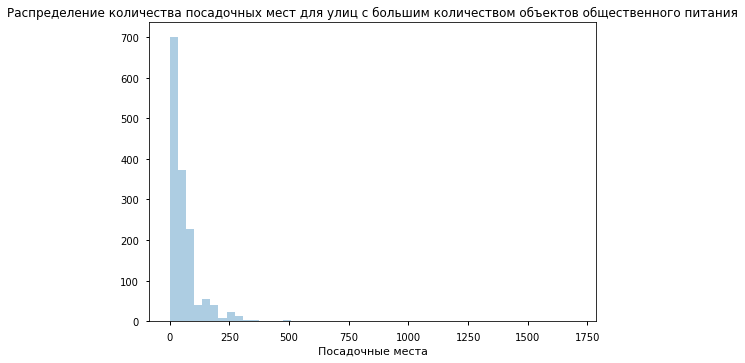

In [54]:
ax=sns.distplot(rest_data.query('street in @top_group_street.street')['number'], color='#3282B8', hist=True, kde=False, axlabel='Посадочные места')
ax.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')

(0, 200)

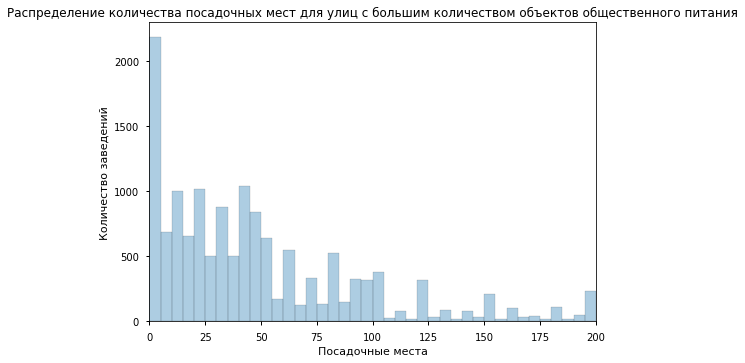

In [55]:
#рассмотрим поближе, возьмем количество мест меньше 200

ax=sns.distplot(rest_data.query('street in @top_group_street.street' and 'number <= 200')['number'], bins=40, color='#3282B8', hist=True, kde=False, hist_kws={'edgecolor':'black'}, axlabel='Посадочные места')
ax.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')
ax.set_ylabel('Количество заведений')
ax.set_xlim(0, 200)

Для улиц с большим количеством объектов общественного питания характерны объекты, в которых до 50 посадочных мест. Среди них наиболее часто встречаются объекты, где количество посадочных мест не больше 5-ти или отсутствует вовсе. Таких заведений более 2-х тысяч 

<div id='id-section11'/>

## 3. Вывод

Исследовали данные объектов общественного питания в Москве. Источник данных: Яндекс.Практикум, 2020.
Данные содержат информацию по 15 тысячам объектов. Все названия привели к нижнему регистру и убрали кавычки, чтобы обнаружить дубликаты. Было выявлено небольшое число дубликатов (85), которые удалили перед анализом.

В результате исследования пришли к следующим выводам:
- Среди всех заведений значительно преобладают кафе. Это говорит о том, что такие заведения пользуются спросом, наиболее востребованы. На втором и третьем месте по количеству заведений в Москве - столовая и ресторан. У них разное предназначение, разная целевая аудитория и разная ценовая категория. Меньше всего заведений типа магазин (отдел кулинарии).
- Сетевых заведений 19% от общего числа. Большинство объектов общественного питания единичны. Но возможность стать сетью есть.
- Сетевое распространение более всего характерно для предприятий быстрого обслуживания, так называемые фастфуды. Доля сетей составляет 41%. Совсем не характерно сетевое распространение для столовых. 23% кафе имеют сети. Это говорит о том, что для кафе этот формат также работает.
- Большинство сетей имеет до 20 заведений и в них до 150 мест. Среди них наиболее часто встречаются сети, в которых до 5 заведений и до 30 мест.
- Самое большое количество посадочных мест в столовых - 130 мест, на втором месте- рестораны - около 100. В остальных объектах общественного питания среднее количество мест значительно ниже. В кафе в среднем 40 посадочных мест, в предприятиях быстрого обслуживания - 20.
- Топ-10 улиц по количеству объектов общественного питания в порядке убывания: проспект Мира, Профсоюзнаю улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе, Кировградская улица. Количество объектов общественного питания на каждой из них больше ста.
- Идея, что есть "наилучший" район для размещения объектов питания, не подтвердилась. Районов много. Улицы проходят по разным районам. Поэтому сосредотачиваться на каком-то конкретном районе не стоит. 
- Число улиц с одним объектом общественного питания 549.
- Менее всего улиц с одним объектом общественного питания в отдаленных административных округах , вероятнее всего, это спальные районы, в которых большинство улиц не имеют объектов оъектов питания вовсе. Там, где есть, достаточно одного. Больше всего улиц с одним объектом общественного питания в центральном административном округе. Выделяются районы Таганский, Хамовники, Басманный, Тверской. Предполагаю, что здесь большинство улиц имеют несколько объектов общественного питания, а не самые проходимые улицы по одному объекту. 
- Для улиц с большим количеством объектов общественного питания характерны объекты, в которых до 50 посадочных мест. Среди них наиболее часто встречаются объекты, где количество посадочных мест не больше 5-ти или отсутствует воовсе. 

Рекомендации:
- формат заведения: кафе
- для этого типа объекта есть возможность развития сети
- количество посадочных мест до 50-ти. Возможен вариант с количеством мест до 30-ти.
- район расположения не важен. Но рекомендую рассматривать улицы с большим количеством объектов общественного питания. Это говорит о том, что места пользуются спросом. Т.к. идея оригинальная и отличается от существующих, кафе сможет выделиться на фоне остальных

Подготовлена презентация в формате pdf с графиками и выводами. Размещена по ссылке: https://drive.google.com/file/d/1eaRbQg16Lio9DtqFHmlakTqWzoFEcSOs/view?usp=sharing